## 1. Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_names = ['customers.csv', 'events.csv', 'fulfillment.csv', 'inventory.csv', 'items.csv', 'orders.csv', 'order_details.csv']
dataframes = {}
for file_name in file_names:
    key = file_name.split('.')[0]
    df = pd.read_csv(file_name)
    dataframes[key] = df
    
customers = dataframes['customers']
events = dataframes['events']
fulfillment = dataframes['fulfillment']
inventory = dataframes['inventory']
items = dataframes['items']
orders = dataframes['orders']
order_details = dataframes['order_details']

## 2. Explore data


We have successfully imported the necessary data. Now let's have a overview of each dataset.

### 2.1. customers dataset

In [2]:
customers.head()

,id,age,sex,state,postal,city,country,lat,long,traffic_src,created_at
0,44262,48,M,Mie,513-0836,Suzuka City,Japan,34.844881,136.515067,Facebook,2020-12-05 14:39:00 UTC
1,61852,21,M,Mie,513-0836,Suzuka City,Japan,34.854950,136.512359,Search,2022-01-24 13:00:00 UTC
2,82418,29,F,Mie,513-0836,Suzuka City,Japan,34.856105,136.503581,Search,2019-09-07 07:29:00 UTC
3,23274,53,M,Acre,69917-400,Rio Branco,Brasil,-9.950741,-67.845347,Search,2020-06-28 14:39:00 UTC
4,30022,23,F,Acre,69917-400,Rio Branco,Brasil,-9.944291,-67.838672,Email,2021-06-01 07:30:00 UTC


In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           100000 non-null  int64  
 1   age          100000 non-null  int64  
 2   sex          100000 non-null  object 
 3   state        100000 non-null  object 
 4   postal       100000 non-null  object 
 5   city         99038 non-null   object 
 6   country      100000 non-null  object 
 7   lat          100000 non-null  float64
 8   long         100000 non-null  float64
 9   traffic_src  100000 non-null  object 
 10  created_at   100000 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 8.4+ MB


In [4]:
customers.describe()

,id,age,lat,long
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,41.005680,28.216307,24.686522
std,28867.657797,17.050124,22.100968,89.884598
min,1.000000,12.000000,-43.262138,-158.166593
25%,25000.750000,26.000000,26.031314,-50.783276
50%,50000.500000,41.000000,35.198930,4.539350
75%,75000.250000,56.000000,40.701451,116.342870
max,100000.000000,70.000000,64.874350,153.567414


### 2.2. events dataset

In [5]:
events.head()

,id,cus_id,sequence_number,session_id,created_at,ip,city,state,postal,browser,traffic_src,path,event_type
0,551,34.0,12,3c06e3f2-e8ed-4eb6-b24c-ccec40b8c2e7,2019-08-16 06:37:53 UTC,106.89.165.48,Kansas City,Kansas,66102,Chrome,Email,/cart,cart
1,1730,106.0,6,6d550704-9304-48df-990d-01fdbb676694,2021-02-22 05:56:40 UTC,103.12.134.61,New York,New York,11372,Chrome,Email,/cart,cart
2,2093,136.0,3,88457dec-f879-4f47-9585-98067ff94d75,2020-01-15 01:35:00 UTC,209.79.4.205,Beijing,Tianjin,300456,Firefox,Email,/cart,cart
3,2190,138.0,3,2729a4a5-1177-4a13-8419-f5f79f350876,2021-03-02 09:15:42 UTC,56.27.73.26,Quanzhou,Liaoning,110041,Chrome,Email,/cart,cart
4,2882,186.0,4,0933c284-960e-4f9b-9950-82e2d831c8e4,2020-01-19 00:54:42 UTC,45.195.175.235,Currais Novos,Rio Grande do Norte,59380-000,Safari,Email,/cart,cart


In [6]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420738 entries, 0 to 2420737
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   cus_id           float64
 2   sequence_number  int64  
 3   session_id       object 
 4   created_at       object 
 5   ip               object 
 6   city             object 
 7   state            object 
 8   postal           object 
 9   browser          object 
 10  traffic_src      object 
 11  path             object 
 12  event_type       object 
dtypes: float64(1), int64(2), object(10)
memory usage: 240.1+ MB


In [7]:
events.describe()

,id,cus_id,sequence_number
count,2.420738e+06,1.296673e+06,2.420738e+06
mean,1.210370e+06,4.984494e+04,3.302979e+00
std,6.988070e+05,2.885942e+04,2.662963e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,6.051852e+05,2.489500e+04,1.000000e+00
50%,1.210370e+06,4.975600e+04,2.000000e+00
75%,1.815554e+06,7.487600e+04,4.000000e+00
max,2.420738e+06,1.000000e+05,1.300000e+01


### 2.3. fulfillment dataset

In [8]:
fulfillment.head()

,id,name,lat,long
0,1,TN,35.112119,-89.973777
1,2,IL,41.837615,-87.680856
2,3,TX,29.765003,-95.360446
3,4,CA,34.040176,-118.244589
4,5,LA,29.947774,-90.061055


In [9]:
fulfillment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      10 non-null     int64  
 1   name    10 non-null     object 
 2   lat     10 non-null     float64
 3   long    10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes


In [10]:
fulfillment.describe()

,id,lat,long
count,10.00000,10.000000,10.000000
mean,5.50000,34.677777,-87.936083
std,3.02765,4.571860,12.720929
min,1.00000,29.765003,-118.244589
25%,3.25000,31.029393,-90.039235
50%,5.50000,33.410849,-87.861306
75%,7.75000,38.738584,-80.228884
max,10.00000,41.837615,-73.782421


### 2.4. inventory dataset

In [11]:
inventory.head()

,id,item_id,created_at,sold_at
0,58100,16898,2021-07-13 13:48:37 UTC,2021-07-25 22:59:37 UTC
1,58101,16898,2021-08-26 05:08:00 UTC,NaN
2,60386,16898,2022-04-04 06:22:56 UTC,2022-05-23 07:33:56 UTC
3,60387,16898,2020-03-15 09:37:00 UTC,NaN
4,60388,16898,2020-11-23 14:49:00 UTC,NaN


In [12]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487901 entries, 0 to 487900
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          487901 non-null  int64 
 1   item_id     487901 non-null  int64 
 2   created_at  487901 non-null  object
 3   sold_at     180952 non-null  object
dtypes: int64(2), object(2)
memory usage: 14.9+ MB


In [13]:
inventory.describe()

,id,item_id
count,487901.000000,487901.000000
mean,243951.000000,15302.587472
std,140845.031181,8426.138128
min,1.000000,1.000000
25%,121976.000000,8005.000000
50%,243951.000000,16047.000000
75%,365926.000000,22592.000000
max,487901.000000,29120.000000


### 2.5. items dataset

In [14]:
items.head()

,id,cost,category,brand,retail_price,department,fulfillment_id
0,27569,92.652563,Swim,2XU,150.410004,Men,1
1,27445,23.719661,Swim,TYR,38.990002,Men,1
2,27457,15.597600,Swim,TYR,27.600000,Men,1
3,27466,17.850000,Swim,TYR,30.000000,Men,1
4,27481,28.608001,Swim,TYR,45.950001,Men,1


In [15]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29120 entries, 0 to 29119
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              29120 non-null  int64  
 1   cost            29120 non-null  float64
 2   category        29120 non-null  object 
 3   brand           29096 non-null  object 
 4   retail_price    29120 non-null  float64
 5   department      29120 non-null  object 
 6   fulfillment_id  29120 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB


In [16]:
items.describe()

,id,cost,retail_price,fulfillment_id
count,29120.000000,29120.000000,29120.000000,29120.000000
mean,14560.500000,28.428148,59.220164,4.982898
std,8406.364256,30.627790,65.888927,2.901153
min,1.000000,-0.991700,0.020000,1.000000
25%,7280.750000,11.231200,24.000000,2.000000
50%,14560.500000,19.620575,39.990002,5.000000
75%,21840.250000,34.368412,69.949997,8.000000
max,29120.000000,557.451002,999.000000,10.000000


### 2.6. orders dataset

In [17]:
orders.head()

,order_id,cus_id,status,sex,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,1,1,Returned,Male,2019-06-04 10:10:00 UTC,2019-06-08 20:53:00 UTC,2019-06-05 17:14:00 UTC,2019-06-08 15:55:00 UTC,2
1,2,2,Processing,Female,2022-05-23 14:42:00 UTC,NaN,NaN,NaN,1
2,3,3,Complete,Male,2020-06-20 15:09:00 UTC,NaN,2020-06-21 12:14:00 UTC,2020-06-24 17:28:00 UTC,3
3,4,3,Complete,Male,2021-08-23 15:09:00 UTC,NaN,2021-08-26 07:58:00 UTC,2021-08-26 14:46:00 UTC,3
4,5,3,Shipped,Male,2021-07-01 15:09:00 UTC,NaN,2021-07-03 11:21:00 UTC,NaN,1


In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124923 entries, 0 to 124922
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   order_id      124923 non-null  int64 
 1   cus_id        124923 non-null  int64 
 2   status        124923 non-null  object
 3   sex           124923 non-null  object
 4   created_at    124923 non-null  object
 5   returned_at   12570 non-null   object
 6   shipped_at    81252 non-null   object
 7   delivered_at  43598 non-null   object
 8   num_of_item   124923 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 8.6+ MB


In [19]:
orders.describe()

,order_id,cus_id,num_of_item
count,124923.000000,124923.000000,124923.000000
mean,62462.000000,49851.135219,1.448508
std,36062.308176,28854.854077,0.803312
min,1.000000,1.000000,1.000000
25%,31231.500000,24894.500000,1.000000
50%,62462.000000,49796.000000,1.000000
75%,93692.500000,74870.500000,2.000000
max,124923.000000,100000.000000,4.000000


### 2.7. order_details dataset

In [20]:
order_details.head()

,id,order_id,item_id,inventory_id,sale_price
0,15721,10826,13606,42278,2.5
1,19167,13243,13606,51560,2.5
2,77007,53140,13606,207367,2.5
3,151639,104681,13606,408715,2.5
4,170817,117931,13606,460556,2.5


In [21]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180952 entries, 0 to 180951
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            180952 non-null  int64  
 1   order_id      180952 non-null  int64  
 2   item_id       180952 non-null  int64  
 3   inventory_id  180952 non-null  int64  
 4   sale_price    180952 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.9 MB


In [22]:
order_details.describe()

,id,order_id,item_id,inventory_id,sale_price
count,180952.000000,180952.000000,180952.000000,180952.000000,180952.000000
mean,90476.500000,62447.517938,15293.072019,243775.026195,59.457094
std,52236.487293,36063.174088,8426.555347,140846.109057,65.545107
min,1.000000,1.000000,1.000000,3.000000,0.020000
25%,45238.750000,31231.750000,7996.750000,121742.250000,24.500000
50%,90476.500000,62405.000000,16028.000000,243722.500000,39.990002
75%,135714.250000,93695.000000,22576.250000,365802.500000,69.949997
max,180952.000000,124923.000000,29120.000000,487901.000000,999.000000


## 3. Data cleaning

### 3.1. Find the missing cities in "customers" dataset

We found that there are 962 missing values in the ***city*** column of the ***customers*** dataset. We use the longtitude and latitude in the **lat** and **long** column to get the city's names.

In [23]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

# Initialize the geocoder
geolocator = Nominatim(user_agent="my_app")

# Function to perform reverse geocoding with retry
def reverse_geocode_with_retry(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True)
        return location
    except GeocoderTimedOut:
        # Retry after a delay
        time.sleep(1)
        return reverse_geocode_with_retry(lat, lon)

# Load the dataset into a DataFrame
customers = pd.read_csv("customers.csv")

# Iterate over the rows of the DataFrame
for index, row in customers.iterrows():
    if pd.isnull(row['city']):  # Check if the city is missing
        lat = row['lat']
        lon = row['long']
        
        # Perform reverse geocoding with retry
        location = reverse_geocode_with_retry(lat, lon)
        
        # Extract the city name from the location
        city = location.raw['address'].get('city', '')
        
        # Replace the missing city value in the DataFrame
        customers.at[index, 'city'] = city

In [24]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           100000 non-null  int64  
 1   age          100000 non-null  int64  
 2   sex          100000 non-null  object 
 3   state        100000 non-null  object 
 4   postal       100000 non-null  object 
 5   city         100000 non-null  object 
 6   country      100000 non-null  object 
 7   lat          100000 non-null  float64
 8   long         100000 non-null  float64
 9   traffic_src  100000 non-null  object 
 10  created_at   100000 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 8.4+ MB


You can observe that there is **no longer null values** in the city column. 

Now, we will check some rows to see that if the city's names are correct.

We retrive 5 rows corresponding with **5 ids that contain null values from the initial dataset**.

In [25]:
# Filter the DataFrame based on the id value
filtered_customers = customers[customers["id"].isin([8037, 35139, 66604, 92807, 98517])]

# Select specific columns for the output
selected_columns = ["id", "city", "country"]

# Format the output for better readability
pd.set_option("display.max_columns", None)  # Display all columns
pd.set_option("display.width", None)  # Remove column wrapping

# View the filtered rows with selected columns
print(filtered_customers[selected_columns].to_string(index=False))

   id      city     country
92807 Barcelona       Spain
98517       창원시 South Korea
35139       창원시 South Korea
 8037    Murcia       Spain
66604    Getafe       Spain


As you can see, we have got the expected results. All the city's names matched with the **country**.

### 3.2. Remove the negative sign in "cost" column of "items" dataset

We noticed that there are some negative values in the **cost** column of the **items** dataset. Maybe it is a **typography error**. We will remove the negative sign from those errors.

In [26]:
# Remove the negative sign from the 'cost' column
items['cost'] = items['cost'].abs()

# Display the updated DataFrame
# Filter the DataFrame based on the id value
filtered_items = items[items["id"].isin([13659, 14235, 14202])]

# Format the output for better readability
pd.set_option("display.max_columns", None)  # Display all columns
pd.set_option("display.width", None)  # Remove column wrapping

# View the filtered rows with selected columns
print(filtered_items.to_string(index=False))

   id    cost    category   brand  retail_price department  fulfillment_id
14235 0.99170 Accessories marshal          0.02      Women               1
13659 0.15016 Accessories    Star          1.82      Women               2
14202 0.38200 Accessories     H2W          1.50      Women               4


The errors have been completely removed.

### 3.3. Convert the wrong format column to appropriate format

We discovered that some columns are recorded as text although the record in each cell are date and time. We will convert all of them into **datetime** format for further analysis.

In [27]:
customers['created_at'] = pd.to_datetime(customers['created_at'], format='mixed')
events['created_at'] = pd.to_datetime(events['created_at'], format='mixed')
inventory['created_at'] = pd.to_datetime(inventory['created_at'], format='mixed')
inventory['sold_at'] = pd.to_datetime(inventory['sold_at'], format='mixed')
orders['created_at'] = pd.to_datetime(orders['created_at'], format='mixed')
orders['returned_at'] = pd.to_datetime(orders['returned_at'], format='mixed')
orders['shipped_at'] = pd.to_datetime(orders['shipped_at'], format='mixed')
orders['delivered_at'] = pd.to_datetime(orders['delivered_at'], format='mixed')

## 4. Modelling

### 4.1. Forecast the Average Revenue for the next 12 months

In order to forecast the Average Revenue for the next 12 months, we must have time-series data. So, we create a dataset named **average_monthly_revenue** from the provided datasets. We have already created the dataset so the underneath lines of code, we don't need to run the code again.

In [28]:
###### Already done !

## Merge the necessary datasets
#merged_data = pd.merge(orders, order_details, on="order_id")
#merged_data = pd.merge(merged_data, items, left_on="item_id", right_on="id")

## Filter out rows with status "Returned"
#merged_data_filtered = merged_data[merged_data['status'] != 'Returned']

## Set 'created_at' column as the index, excluding the time
#merged_data_filtered.set_index(merged_data_filtered['created_at'].dt.date, inplace=True)
#merged_data_filtered.index = pd.to_datetime(merged_data_filtered.index)

## Calculate the daily revenue
#daily_revenue = merged_data_filtered.resample('D')['sale_price'].sum().round(2)

## Resample the daily revenue to monthly frequency and calculate the average
#average_monthly_revenue = daily_revenue.resample('M').mean().round(2)

## Create a DataFrame with "date" and "revenue" columns
#output_data = pd.DataFrame({'date': average_monthly_revenue.index, 'revenue': average_monthly_revenue.values})

## Save the DataFrame as a CSV file
#output_data.to_csv('average_monthly_revenue.csv', index=False)

In [29]:
# Load the dataset
monthly_revenue = pd.read_csv('average_monthly_revenue.csv')
df = pd.DataFrame(monthly_revenue)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

import matplotlib.pyplot as plt
%matplotlib inline

### Seasonality Check

<Axes: >

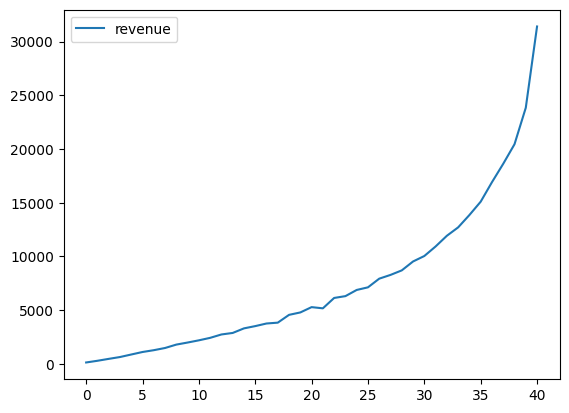

In [30]:
monthly_revenue.plot()

As you can observe from the chart, the dataset is completely **non-seasonal**. Because the ARMA and ARIMA model have been remove from Python, we will use the SARIMAX model and eliminate the seasonal components.

### Stationary check

The SARIMAX will provide accurate forecast when the dataset is *stationary*

We will check if the series is stationary using the **Augmented Dickey Fuller test (ADF Test)**, from the statsmodels package. The reason being is that we need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.

The **null hypothesis (Ho)** of the ADF test is that the time series is **non-stationary**. So, if the p-value of the test is less than the significance level (0.05) then we reject the null hypothesis and infer that the time series is indeed stationary. If P Value > 0.05, accept the null hypothesis and go ahead with finding the order of differencing.

In [31]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(monthly_revenue['revenue'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.220334
p-value: 0.018837


As p-value < 0.05, therefore our dataset is **stationary**. We do not have to differentiate the series.

### Choose the best model

In Python, the pmdarima package provides **auto_arima()** function which can be used to automate the process of SARIMAX Forecasting in Python.

**auto_arima()** uses a stepwise approach to search multiple combinations of **p,d,q parameters** and chooses the best model that has the least AIC.

In [32]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(monthly_revenue['revenue'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=633.710, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=633.591, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=634.147, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=634.882, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=633.869, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.148 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   41
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -314.795
Date:                Sun, 18 Jun 2023   AIC                            633.591
Time:                        22:10:00   BIC                            636.918
Sample:                             0   HQIC                           634.785
                                 - 41                                         
Co

We can observe that SARIMAX(0, 2, 0) is the best model. Now, we will check if the model is a good fit.

### Residual plot diagnostics

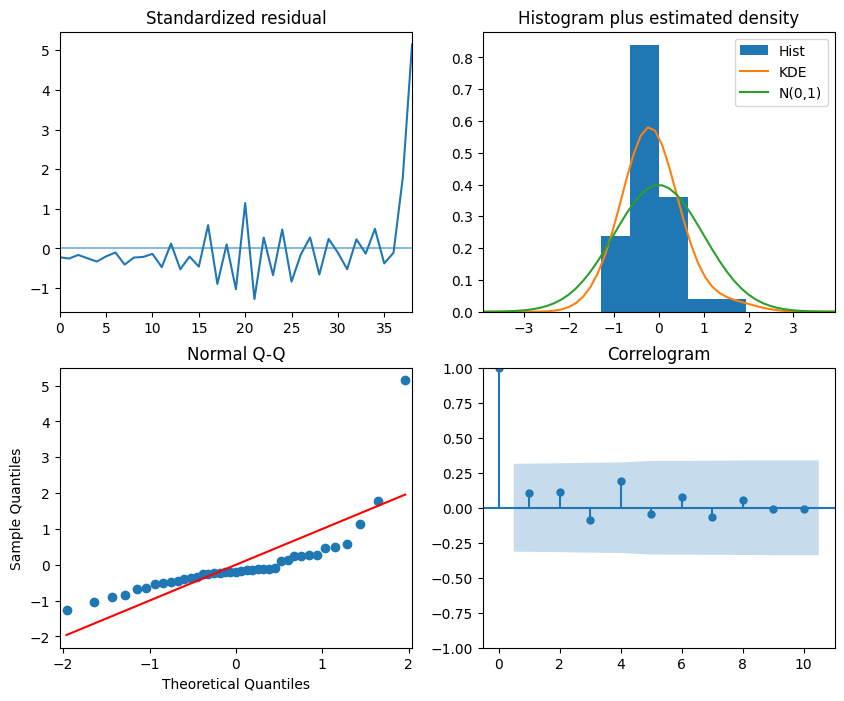

In [33]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

**Standardized residual**: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

**Histogram**: The density plot suggest normal distribution with mean slighlty shifted towards right.

**Theoretical Quantiles**: Mostly the dots fall almost perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

**Correlogram**: The Correlogram, (or ACF plot) shows the residual errors are not autocorrelated. The ACF plot would imply that there is some pattern in the residual errors which are not explained in the model. So we will need to look for more X’s (predictors) to the model.

**Overall, the model seems to be a good fit. So, let's use it to forecast.**

### Forecasting for the next 12 months

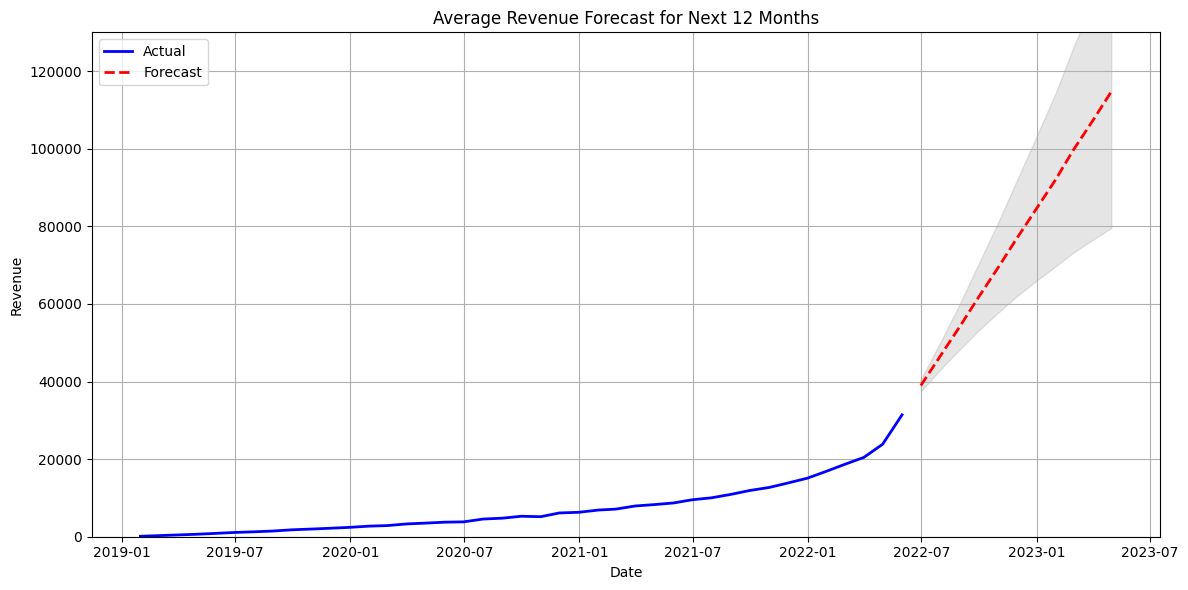

In [34]:
from statsmodels.tsa.arima.model import ARIMA

df.index.freq = 'M'  # Set the frequency to monthly ('M')

# Fit the ARIMA model to the dataset
model = ARIMA(df['revenue'], order=(0, 2, 0))
model_fit = model.fit()

# Forecast the next 12 months
n_pred_previous = 10
forecast_start_date = df.index[-1] + pd.DateOffset(months=1)
forecast_end_date = forecast_start_date + pd.DateOffset(months=n_pred_previous)
forecast = model_fit.get_prediction(start=forecast_start_date, end=forecast_end_date)
forecast_values = forecast.predicted_mean
confint = forecast.conf_int()

# Create series for fitted values and confidence intervals
fitted_series = pd.Series(forecast_values, index=forecast_values.index)
lower = confint.iloc[:, 0]
upper = confint.iloc[:, 1]

# Plot the forecasted revenue
plt.figure(figsize=(12, 6))
plt.plot(df.index[-360:], df['revenue'][-360:], label='Actual', color='blue', linewidth=2)
plt.plot(fitted_series, color='red', linestyle='--', label='Forecast', linewidth=2)
plt.fill_between(forecast_values.index, lower, upper, color='grey', alpha=0.2)
plt.ylim((0, 130000))
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Average Revenue Forecast for Next 12 Months')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### 4.2. Customer Segmentation using RFM and K-means model

In [35]:
# import the necessary libraries
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer

In [47]:
# Collect data from order and order_details to build RFM matrix
order_merged = pd.merge(order_details[['order_id', 'sale_price']], orders[['order_id', 'cus_id', 'num_of_item', 'created_at', 'status']], on = ['order_id'])
cluster_data = pd.merge(order_merged, customers[['id','age', 'sex', 'country', 'traffic_src']], left_on = ['cus_id'], right_on = ['id']).drop('id', axis = 1)
cluster_data['order_value'] = cluster_data.sale_price*cluster_data.num_of_item

In [48]:
# Select the 'Complete' status
cluster_data = cluster_data[cluster_data.status == 'Complete']

In [49]:
# Turn column 'created_at' from object to datetime
cluster_data.created_at = pd.to_datetime(cluster_data.created_at)

In [50]:
cluster_data.count()

order_id       45010
sale_price     45010
cus_id         45010
num_of_item    45010
created_at     45010
status         45010
age            45010
sex            45010
country        45010
traffic_src    45010
order_value    45010
dtype: int64

In [51]:
import datetime
current_date = max(cluster_data['created_at']) + datetime.timedelta(days=1)

# Group by CustomerID to calculate Recency, Frequency, MonetaryValue

df_customers = cluster_data.groupby(['cus_id']).agg(
    {'created_at': lambda x: (current_date- x.max()).days,
     'order_id':'count',
     'order_value':'sum'
     }
)
df_customers.rename(columns={'created_at':'Recency','order_id':'Frequency','order_value':'MonetaryValue'}, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3296\1763994772.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customers['Recency'], ax = ax[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_3296\1763994772.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customers['Frequency'], ax = ax[1], kd

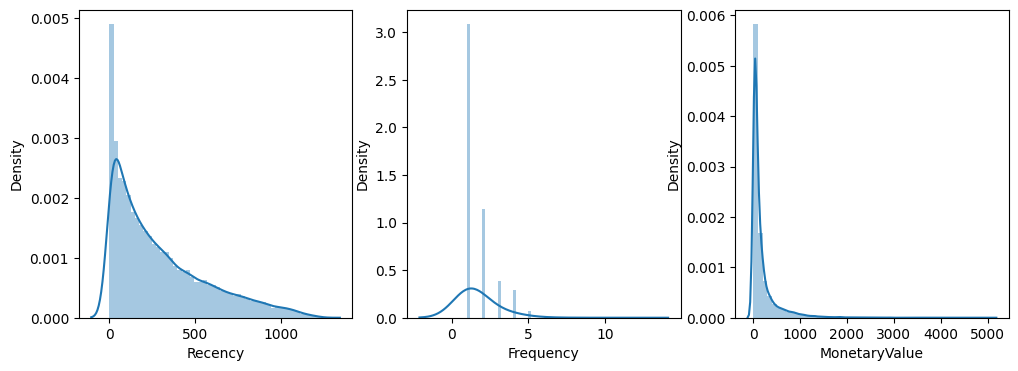

In [52]:
# Check the distribution of dataset
import seaborn as sns
fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.distplot(df_customers['Recency'], ax = ax[0])
sns.distplot(df_customers['Frequency'], ax = ax[1], kde_kws={"bw": 1})
sns.distplot(df_customers['MonetaryValue'], ax = ax[2])
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3296\2144065126.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stats.boxcox(df_customers['Recency'])[0], ax = ax[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_3296\2144065126.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stats.boxcox(df_customer

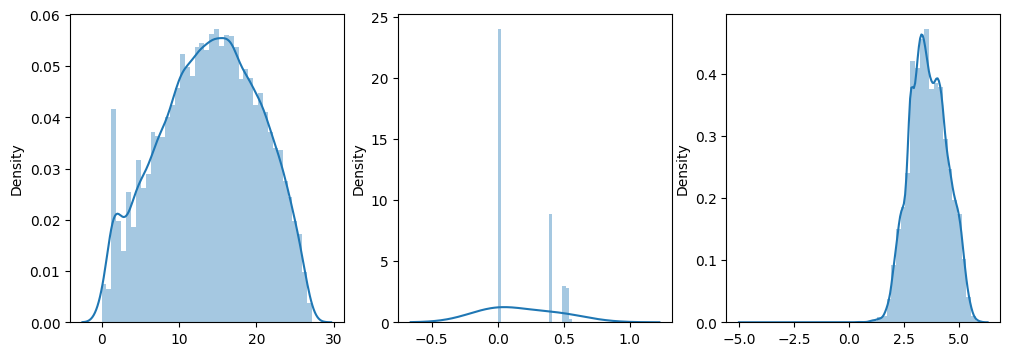

In [53]:
from scipy import stats
fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.distplot(stats.boxcox(df_customers['Recency'])[0], ax = ax[0])
sns.distplot(stats.boxcox(df_customers['Frequency'])[0], ax = ax[1], kde_kws={"bw": 1})
sns.distplot(stats.boxcox(df_customers['MonetaryValue'])[0], ax = ax[2])
plt.show()

In [54]:
# Boxcow to adjust the skewness of each variable for better K-means results
from scipy import stats
df_customers_t = pd.DataFrame()
df_customers_t['Recency'] = stats.boxcox(df_customers['Recency'])[0]
df_customers_t['Frequency'] = stats.boxcox(df_customers['Frequency'])[0]
df_customers_t['MonetaryValue'] = stats.boxcox(df_customers['MonetaryValue'])[0]
df_customers_t.head()

,Recency,Frequency,MonetaryValue
0,15.974805,0.548933,4.812604
1,20.527283,0.522915,4.974323
2,17.043617,0.000000,3.555776
3,6.424027,0.402519,4.909836
4,23.745737,0.402519,5.112315


In [55]:
# Scale the data to prevent dominant variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_customers_t)

df_customers_t = scaler.transform(df_customers_t)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

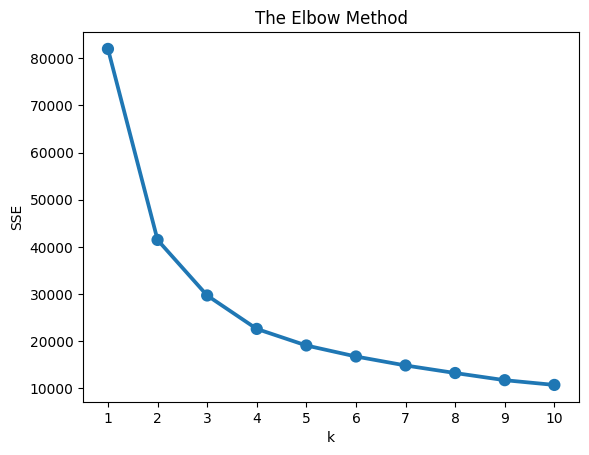

In [56]:
# Choose the number of cluster
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_customers_t)
    sse[k] = kmeans.inertia_


plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [57]:
# Fit the model to the data and lebel the data
model = KMeans(n_clusters=4, random_state=42)
model.fit(df_customers_t)
df_customers['Cluster'] = model.labels_
df_customers.head()

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Recency,Frequency,MonetaryValue,Cluster
cus_id,,,,
3,290,6,537.390009,1
15,567,4,715.959999,1
20,344,1,72.000000,2
25,33,2,638.000000,3
34,846,2,920.000000,1


In [58]:
# Showing characteristics of each groups
df_customers.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'MonetaryValue':'mean'
    }
).round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,78.98,1.00,58.45
1,464.56,2.65,396.05
2,499.01,1.00,58.42
3,70.08,2.72,382.68
